<a href="https://colab.research.google.com/github/raunaqSingh0713/face-mask-detection/blob/main/FacemaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#upload kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 98% 160M/163M [00:07<00:00, 29.2MB/s]
100% 163M/163M [00:07<00:00, 23.4MB/s]


In [3]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [4]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [5]:
import os

In [6]:
filenames_with_mask = os.listdir('/content/data/with_mask') 

In [7]:
filenames_without_mask = os.listdir('/content/data/without_mask')

In [8]:
num_of_with_mask = len(filenames_with_mask)

In [9]:
num_of_without_mask = len(filenames_without_mask)

In [10]:
  import numpy as np
  from PIL import Image
  import matplotlib.image as mpimg
  import matplotlib.pyplot as plt
  from sklearn.model_selection import train_test_split  

**Creating labels for two class of images**

In [11]:
with_mask_labels = [1] * num_of_with_mask

In [12]:
without_mask_labels = [0] * num_of_without_mask

In [13]:
labels = with_mask_labels + without_mask_labels

0--> with mask (True)

1--> without mask (False)

understanding image dataset

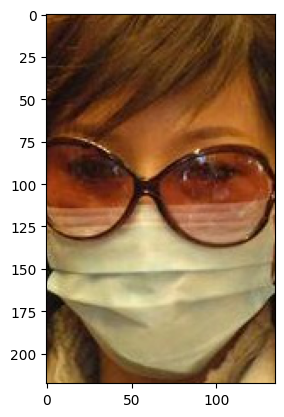

In [14]:
#displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_10.jpg')
plt.imshow(img)

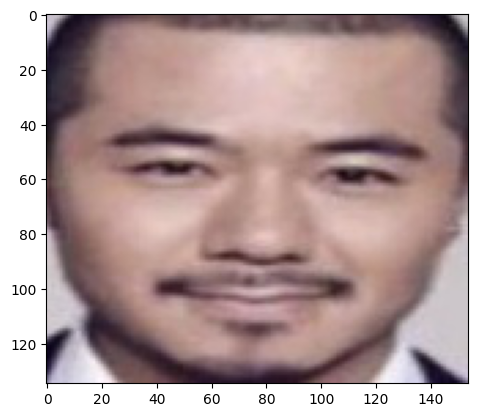

In [15]:
#displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_10.jpg')
plt.imshow(img)

resizing images and saving these images in different folders  (since images have different dimensions, we cannot feed them into the neural network)

In [16]:
#creating directories forresized images 
os.mkdir('with_mask_resized')
os.mkdir('without_mask_resized')

In [17]:
#resize with mask images

with_mask_folder = '/content/data/with_mask/'
with_mask_resized_folder = '/content/with_mask_resized/'

for filename in os.listdir(with_mask_folder):
  img_path = with_mask_folder + filename
  img = Image.open(img_path)
  img = img.resize((128,128))  
  img = img.convert('RGB')
  newImgPath = with_mask_resized_folder + filename # path is changed of the resized images but individual filename of the image remains the same
  img.save(newImgPath)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
#resize without mask images

without_mask_folder = '/content/data/without_mask/'
without_mask_resized_folder = '/content/without_mask_resized/'

for filename in os.listdir(without_mask_folder):
  img_path = without_mask_folder + filename
  img = Image.open(img_path)
  img = img.resize((128,128))  
  img = img.convert('RGB')
  newImgPath = without_mask_resized_folder + filename # path is changed of the resized images but individual filename of the image remains the same
  img.save(newImgPath)

**Converting images into numpy array**

In [19]:
import cv2
import glob

In [20]:
#reading with mask images
imdir = '/content/with_mask_resized/'
ext = ['png','jpg']

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

with_mask_images = np.asarray([cv2.imread(file) for file in files])

In [21]:
#reading without mask images
imdir = '/content/without_mask_resized/'
ext = ['png','jpg']

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

without_mask_images = np.asarray([cv2.imread(file) for file in files])

In [23]:
print(with_mask_images.shape)
print(without_mask_images.shape)

(3725, 128, 128, 3)
(3828, 128, 128, 3)


In [24]:
combined_images = np.concatenate((with_mask_images, without_mask_images))

In [25]:
print(combined_images.shape)

(7553, 128, 128, 3)


In [26]:
# data and labels
X = combined_images
Y = np.asarray(labels)

Train Test Split

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [28]:
print(X.shape, Y.shape, X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(7553, 128, 128, 3) (7553,) (6042, 128, 128, 3) (6042,) (1511, 128, 128, 3) (1511,)


In [29]:
print(X_train[0])

[[[214 198 181]
  [215 199 182]
  [216 200 183]
  ...
  [234 226 213]
  [233 225 212]
  [233 225 212]]

 [[214 198 181]
  [215 199 182]
  [216 200 183]
  ...
  [232 224 211]
  [232 224 211]
  [231 223 210]]

 [[216 198 181]
  [217 199 182]
  [218 200 183]
  ...
  [231 223 210]
  [230 222 209]
  [230 222 209]]

 ...

 [[255 255 254]
  [255 255 254]
  [255 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 254]
  [255 255 254]
  [255 255 254]
  ...
  [253 255 255]
  [253 255 255]
  [253 255 255]]

 [[255 255 254]
  [255 255 254]
  [255 255 254]
  ...
  [251 255 255]
  [251 255 255]
  [251 255 255]]]


In [30]:
#standardizing the data
X_train_std = X_train/255
X_test_std = X_test/255

In [31]:
print(X_train_std[0])

[[[0.83921569 0.77647059 0.70980392]
  [0.84313725 0.78039216 0.71372549]
  [0.84705882 0.78431373 0.71764706]
  ...
  [0.91764706 0.88627451 0.83529412]
  [0.91372549 0.88235294 0.83137255]
  [0.91372549 0.88235294 0.83137255]]

 [[0.83921569 0.77647059 0.70980392]
  [0.84313725 0.78039216 0.71372549]
  [0.84705882 0.78431373 0.71764706]
  ...
  [0.90980392 0.87843137 0.82745098]
  [0.90980392 0.87843137 0.82745098]
  [0.90588235 0.8745098  0.82352941]]

 [[0.84705882 0.77647059 0.70980392]
  [0.85098039 0.78039216 0.71372549]
  [0.85490196 0.78431373 0.71764706]
  ...
  [0.90588235 0.8745098  0.82352941]
  [0.90196078 0.87058824 0.81960784]
  [0.90196078 0.87058824 0.81960784]]

 ...

 [[1.         1.         0.99607843]
  [1.         1.         0.99607843]
  [1.         1.         0.99607843]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         0.99607843]
  [1.         1.         0.99607843]


**Building the Neural Network**

In [32]:
import tensorflow as tf
import keras

In [33]:
model = keras.Sequential([
    
    keras.layers.Flatten(input_shape = (128, 128, 3)),
    keras.layers.Dense(70, activation = 'relu'),
    keras.layers.Dense(70, activation = 'relu'),
    keras.layers.Dense(2, activation = 'sigmoid')
])

In [34]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [35]:
model.fit(X_train_std, Y_train, epochs = 10)

Epoch 1/10
189/189 [==============================] - 24s 118ms/step - loss: 1.1532 - accuracy: 0.7181
Epoch 2/10
189/189 [==============================] - 13s 68ms/step - loss: 0.6148 - accuracy: 0.7759
Epoch 3/10
189/189 [==============================] - 13s 68ms/step - loss: 0.4196 - accuracy: 0.8302
Epoch 4/10
189/189 [==============================] - 12s 66ms/step - loss: 0.3313 - accuracy: 0.8697
Epoch 5/10
189/189 [==============================] - 12s 65ms/step - loss: 0.3342 - accuracy: 0.8664
Epoch 6/10
189/189 [==============================] - 12s 61ms/step - loss: 0.2992 - accuracy: 0.8797
Epoch 7/10
189/189 [==============================] - 12s 62ms/step - loss: 0.3094 - accuracy: 0.8764
Epoch 8/10
189/189 [==============================] - 17s 88ms/step - loss: 0.3356 - accuracy: 0.8583
Epoch 9/10
189/189 [==============================] - 12s 62ms/step - loss: 0.3009 - accuracy: 0.8876
Epoch 10/10
189/189 [==============================] - 11s 58ms/step - loss: 0.38

In [36]:
score, acc = model.evaluate(X_test_std, Y_test)
print('Test data loss:', score)
print('Test data acc:', acc)

48/48 [==============================] - 1s 16ms/step - loss: 0.2977 - accuracy: 0.8795
Test data loss: 0.29770922660827637
Test data acc: 0.8795499801635742


**Building a Predictive System**

In [37]:
from google.colab.patches import cv2_imshow 

path ofthe image to be predicted: /content/WIN_20230226_14_49_53_Pro.jpg


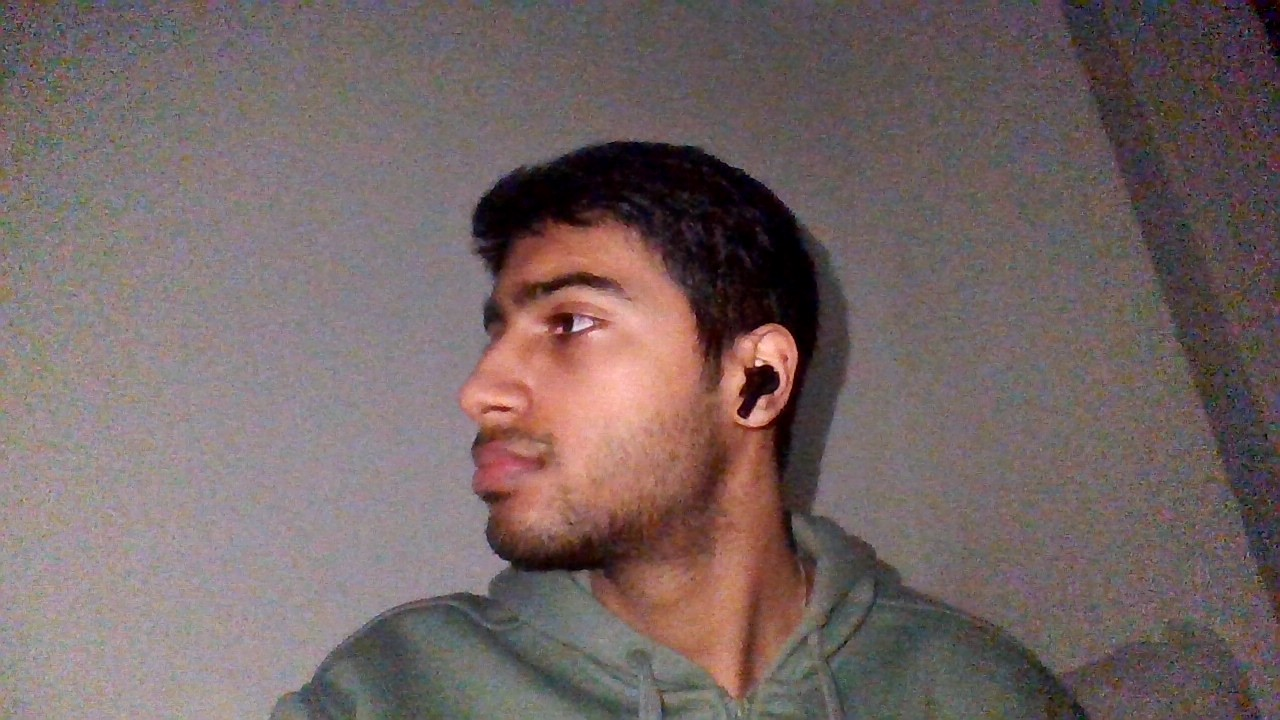

1/1 [==============================] - 0s 39ms/step
The person is not wearing a mask


In [39]:
input_image_path = input('path ofthe image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (128, 128))

input_image_resize = input_image_resize/255

image_reshape = np.reshape(input_image_resize, [1,128,128,3])

input_prediction = model.predict(image_reshape)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 1:
  print('The person is wearing a mask')

else:
    print('The person is not wearing a mask')